# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Loading Data

In [2]:
raw_data = pd.read_excel('Dataset 1 Patient 18.xlsx')
raw_data.sample(5)

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
180326,0.6689,0.1074,0.4321,1.1841,0.1636,0.1050,0.4590,0.5225,0.4004,0.5200,4,4,10,10
173398,0.1172,0.0024,0.0024,0.0024,0.0024,0.0757,0.3223,0.5566,0.0024,0.3735,6,6,9,9
176933,2.1021,0.6445,0.6177,0.1514,0.2222,0.2173,0.4639,0.9351,0.1929,0.3833,10,10,9,9
237520,0.8447,0.4346,0.2661,0.0024,0.0024,0.0024,0.0586,0.3931,0.0439,0.1343,2,2,17,17
170610,0.0562,0.0024,0.0024,0.0024,0.0024,0.0244,0.1489,0.0269,0.0024,0.0146,0,0,0,0


In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 465533 entries, 0 to 465532
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Emg1          465533 non-null  float64
 1   Emg2          465533 non-null  float64
 2   Emg3          465533 non-null  float64
 3   Emg4          465533 non-null  float64
 4   Emg5          465533 non-null  float64
 5   Emg6          465533 non-null  float64
 6   Emg7          465533 non-null  float64
 7   Emg8          465533 non-null  float64
 8   Emg9          465533 non-null  float64
 9   Emg10         465533 non-null  float64
 10  repetition    465533 non-null  int64  
 11  rerepetition  465533 non-null  int64  
 12  stimulus      465533 non-null  int64  
 13  restimulus    465533 non-null  int64  
dtypes: float64(10), int64(4)
memory usage: 49.7 MB


In [4]:
raw_data.describe(include='all')

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
count,465533.000000,465533.000000,465533.000000,465533.000000,465533.000000,465533.000000,465533.000000,465533.000000,465533.000000,465533.000000,465533.000000,465533.000000,465533.000000,465533.000000
mean,0.413167,0.117170,0.100465,0.060755,0.016404,0.034723,0.206456,0.394925,0.103675,0.206401,3.174965,2.367557,5.626065,4.255810
std,0.517157,0.271862,0.248185,0.184027,0.044366,0.095586,0.344918,0.450669,0.259265,0.352236,3.484753,3.325123,6.580095,6.332307
min,0.000000,0.000000,0.000000,0.000000,0.002400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.105000,0.002400,0.002400,0.002400,0.002400,0.002400,0.024400,0.102500,0.002400,0.002400,0.000000,0.000000,0.000000,0.000000
50%,0.219700,0.002400,0.002400,0.002400,0.002400,0.002400,0.100100,0.261200,0.002400,0.087900,2.000000,0.000000,3.000000,0.000000
75%,0.507800,0.105000,0.063500,0.039100,0.004900,0.029300,0.239300,0.510300,0.065900,0.258800,6.000000,5.000000,10.000000,8.000000
max,4.665500,4.665500,3.601100,4.204100,0.988800,2.390100,4.663100,4.665500,3.337400,4.663100,10.000000,10.000000,23.000000,23.000000


In [5]:
print("Unique Dependent values and their counts :")
print(raw_data["stimulus"].value_counts())

Unique Dependent values and their counts :
0     196783
12     15549
8      15546
7      15542
2      15538
5      15535
4      15520
11     15516
9      15512
6      15499
10     15472
1      15463
3      15462
13     10372
17     10362
14     10353
15     10321
16     10282
21      5181
18      5170
19      5169
20      5132
23      5132
22      5122
Name: stimulus, dtype: int64


# Data Cleaning

In [6]:
index_names = raw_data[ (raw_data['stimulus'] != raw_data['restimulus'])].index
raw_data.drop(index_names, inplace = True)

In [7]:
index_names = raw_data[ (raw_data['repetition'] != raw_data['rerepetition'])].index
raw_data.drop(index_names, inplace = True)

In [8]:
X = raw_data.iloc[:,0:10]
y = raw_data.stimulus

# One Hot Encoding

In [9]:
num_classes = 24

In [10]:
# One hot encoding for categorical labels
import keras
from keras import utils as np_utils
y = keras.utils.np_utils.to_categorical(y, num_classes)

In [11]:
input_dim = X.shape[1]

# Standard Scaler

In [12]:
from sklearn.preprocessing import StandardScaler
standardscaler=StandardScaler()

In [13]:
sc = pd.DataFrame(standardscaler.fit_transform(X))

In [14]:
sc

,0,1,2,3,4,5,6,7,8,9
0,-0.820557,-0.455957,-0.436302,-0.348612,-0.348253,-0.362539,-0.609482,-0.890029,-0.43114,-0.602054
1,-0.820557,-0.455957,-0.436302,-0.348612,-0.348253,-0.362539,-0.609482,-0.890029,-0.43114,-0.602054
2,-0.820557,-0.455957,-0.436302,-0.348612,-0.348253,-0.362539,-0.609482,-0.890029,-0.43114,-0.602054
3,-0.820557,-0.455957,-0.436302,-0.336159,-0.348253,-0.362539,-0.609482,-0.890029,-0.43114,-0.602054
4,-0.820557,-0.455957,-0.436302,-0.348612,-0.348253,-0.362539,-0.609482,-0.890029,-0.43114,-0.602054
...,...,...,...,...,...,...,...,...,...,...
380916,-0.744778,-0.455957,-0.436302,-0.348612,-0.348253,-0.362539,-0.589619,-0.492735,-0.43114,-0.428430
380917,-0.744778,-0.455957,-0.436302,-0.348612,-0.348253,-0.362539,-0.583177,-0.487730,-0.43114,-0.435007
380918,-0.758107,-0.455957,-0.436302,-0.348612,-0.348253,-0.362539,-0.583177,-0.497949,-0.43114,-0.460524
380919,-0.767055,-0.455957,-0.436302,-0.348612,-0.348253,-0.362539,-0.589619,-0.508168,-0.43114,-0.460524


In [15]:
# Splitting data for training and testing
X_train, X_test, y_train, y_test = train_test_split(sc, y, test_size = 0.2, random_state = 39)

# Deep Learning 

In [16]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,ELU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import plot_model
import tensorflow as tf
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import StratifiedKFold

In [17]:
from keras.layers import LeakyReLU
LeakyReLU = LeakyReLU(alpha=0.1)
from keras.models import Sequential
from keras.layers import Dense, Flatten, Convolution1D, Dropout
from keras.initializers import random_uniform

# 1. Define Network

In [18]:
num_classes = 24
input_dim = X.shape[1]

In [19]:
visible = Input(shape=(input_dim,))
hidden1 = Dense(3000, activation='relu')(visible)
hidden2 = Dense(1500, activation='relu')(hidden1)
hidden3 = Dropout(0.2)(hidden2)
hidden4 = Dense(750, activation='relu')(hidden3)
hidden5 = Dense(375, activation='relu')(hidden4)
hidden6 = Dense(48, activation='relu')(hidden5)
output = Dense(num_classes, activation='softmax')(hidden6)
model = Model(inputs=visible, outputs=output)

In [20]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10)]              0         
                                                                 
 dense (Dense)               (None, 3000)              33000     
                                                                 
 dense_1 (Dense)             (None, 1500)              4501500   
                                                                 
 dropout (Dropout)           (None, 1500)              0         
                                                                 
 dense_2 (Dense)             (None, 750)               1125750   
                                                                 
 dense_3 (Dense)             (None, 375)               281625    
                                                                 
 dense_4 (Dense)             (None, 48)                18048 

# 2. Compile Network

In [21]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [22]:
plot_model(model, 'EMG_ANN', show_shapes = True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


# 3. Fit Network

In [23]:
history = model.fit(X_train, y_train, batch_size=4056, epochs=100, validation_data = (X_test, y_test))

Epoch 1/100
76/76 [==============================] - 3s 27ms/step - loss: 1.4420 - accuracy: 0.6235 - val_loss: 1.0819 - val_accuracy: 0.7067
Epoch 2/100
76/76 [==============================] - 2s 25ms/step - loss: 0.9877 - accuracy: 0.7315 - val_loss: 0.8902 - val_accuracy: 0.7600
Epoch 3/100
76/76 [==============================] - 2s 25ms/step - loss: 0.8518 - accuracy: 0.7659 - val_loss: 0.8057 - val_accuracy: 0.7796
Epoch 4/100
76/76 [==============================] - 2s 26ms/step - loss: 0.7772 - accuracy: 0.7849 - val_loss: 0.7355 - val_accuracy: 0.7959
Epoch 5/100
76/76 [==============================] - 2s 26ms/step - loss: 0.7181 - accuracy: 0.8005 - val_loss: 0.6886 - val_accuracy: 0.8076
Epoch 6/100
76/76 [==============================] - 2s 25ms/step - loss: 0.6746 - accuracy: 0.8122 - val_loss: 0.6518 - val_accuracy: 0.8195
Epoch 7/100
76/76 [==============================] - 2s 25ms/step - loss: 0.6310 - accuracy: 0.8237 - val_loss: 0.6272 - val_accuracy: 0.8262
Epoch 

76/76 [==============================] - 2s 26ms/step - loss: 0.2325 - accuracy: 0.9327 - val_loss: 0.2659 - val_accuracy: 0.9250
Epoch 59/100
76/76 [==============================] - 2s 26ms/step - loss: 0.2273 - accuracy: 0.9346 - val_loss: 0.2591 - val_accuracy: 0.9273
Epoch 60/100
76/76 [==============================] - 2s 25ms/step - loss: 0.2247 - accuracy: 0.9353 - val_loss: 0.2746 - val_accuracy: 0.9234
Epoch 61/100
76/76 [==============================] - 2s 27ms/step - loss: 0.2268 - accuracy: 0.9344 - val_loss: 0.2568 - val_accuracy: 0.9275
Epoch 62/100
76/76 [==============================] - 2s 26ms/step - loss: 0.2222 - accuracy: 0.9361 - val_loss: 0.2521 - val_accuracy: 0.9289
Epoch 63/100
76/76 [==============================] - 2s 26ms/step - loss: 0.2238 - accuracy: 0.9354 - val_loss: 0.2493 - val_accuracy: 0.9294
Epoch 64/100
76/76 [==============================] - 2s 27ms/step - loss: 0.2182 - accuracy: 0.9366 - val_loss: 0.2526 - val_accuracy: 0.9285
Epoch 65/100

# 4.Evaluate Network

## 4.1. Plotting Loss and Accuracy

Text(0.5, 1.0, 'Loss Curve of Deep Neural Netowork')

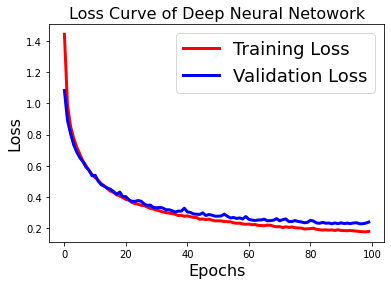

In [24]:
#Loss Curve


plt.plot(figsize = [8,6])

plt.plot(history.history['loss'],'r',linewidth = 3.0)
plt.plot(history.history['val_loss'],'b',linewidth = 3.0)

plt.legend(['Training Loss', 'Validation Loss'], fontsize = 18)

plt.xlabel('Epochs', fontsize = 16)
plt.ylabel('Loss', fontsize = 16)

plt.title('Loss Curve of Deep Neural Netowork' , fontsize = 16 )



Text(0.5, 1.0, 'Accuracy Curve of Deep Neural Netowork')

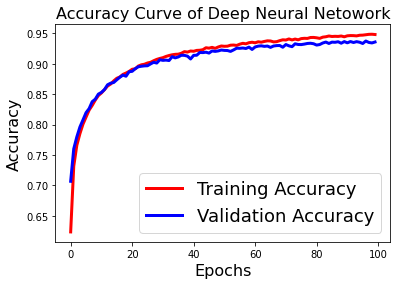

In [25]:
#Accuracy Curve

plt.plot(figsize = [8,6])
plt.plot(history.history['accuracy'],'r',linewidth = 3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth = 3.0)

plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize = 18)

plt.xlabel('Epochs', fontsize = 16)
plt.ylabel('Accuracy', fontsize = 16)


plt.title('Accuracy Curve of Deep Neural Netowork' , fontsize = 16 )

##  4.2 Make Predictions

In [26]:
predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis = 1)

In [27]:
predictions

array([ 9, 13,  0, ...,  0, 15,  8], dtype=int64)

#### Transforming from One Hot Encoding

In [28]:
y_test =np.argmax(y_test, axis=1)
y_test[1]

13

In [29]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, predictions)}
print(f"Accuracy is: {accuracy_score(y_test, predictions)* 100}")

Accuracy is: 93.57091290936536


## 4.3 Classification Report

Classification report : 
               precision    recall  f1-score   support

           0       0.92      0.99      0.95     37921
           1       0.97      0.92      0.95      2329
           2       0.96      0.92      0.94      2183
           3       0.96      0.87      0.91      2198
           4       0.97      0.94      0.95      1991
           5       0.97      0.89      0.93      2138
           6       0.97      0.88      0.92      2215
           7       0.95      0.82      0.88      2208
           8       0.95      0.87      0.91      2271
           9       0.91      0.83      0.87      2148
          10       0.95      0.84      0.89      2046
          11       0.91      0.89      0.90      2208
          12       0.96      0.83      0.89      1979
          13       0.95      0.95      0.95      1438
          14       0.94      0.89      0.92      1369
          15       0.88      0.80      0.84      1583
          16       0.98      0.91      0.94      1564
 

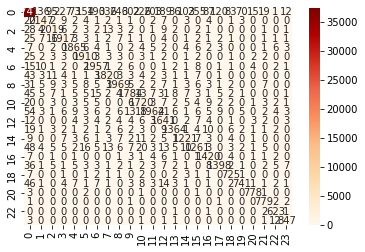

In [30]:
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, classification_report
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, predictions))

cm = confusion_matrix(predictions, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

## 4.4 Evaluation

In [31]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.5542692130996916
MSE: 6.428837697709523
RMSE: 2.5355152726239933


In [32]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, predictions, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, predictions,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, predictions,average='weighted'))

Precision Score :  0.9368274059534929
Recall Score :  0.9357091290936536
f1_score :  0.9349020899410966
